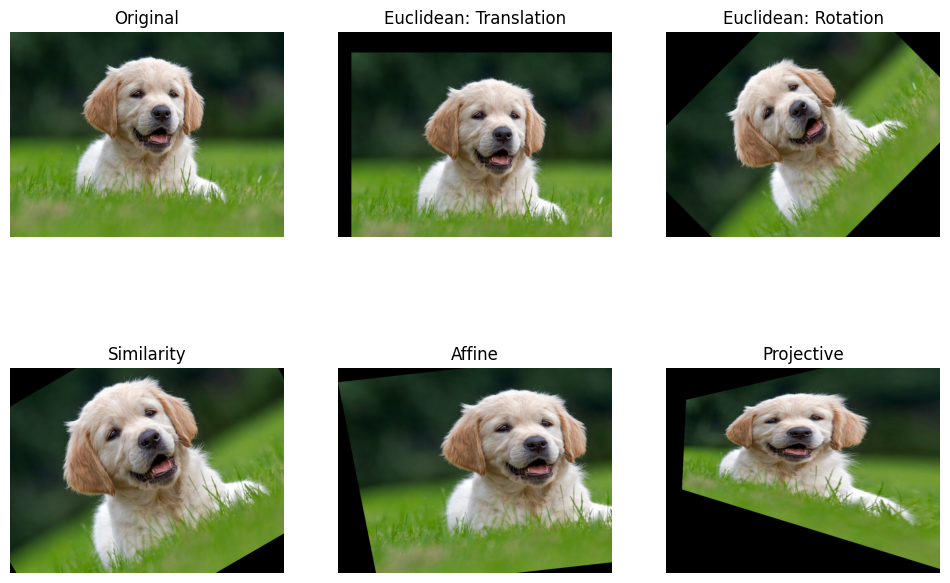

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = cv2.imread("C:\\Users\\shiba\\Downloads\\Dog_Breeds.jpg")   # replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, ch = img.shape

# ---------- 1. EUCLIDEAN TRANSFORMATION (Translation + Rotation) ----------
# Translation
tx, ty = 50, 80
M_translate = np.float32([[1, 0, tx],
                          [0, 1, ty]])
euclidean_translation = cv2.warpAffine(img, M_translate, (cols, rows))

# Rotation about image center
angle = 45
M_rotate = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
euclidean_rotation = cv2.warpAffine(img, M_rotate, (cols, rows))

# ---------- 2. SIMILARITY TRANSFORMATION ----------
# Scaling + Rotation
scale = 1.2
M_similarity = cv2.getRotationMatrix2D((cols/2, rows/2), 30, scale)
similarity = cv2.warpAffine(img, M_similarity, (cols, rows))

# ---------- 3. AFFINE TRANSFORMATION ----------
# Needs 3 points
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[70, 100], [250, 80], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(img, M_affine, (cols, rows))

# ---------- 4. PROJECTIVE TRANSFORMATION (HOMOGRAPHY) ----------
# Needs 4 points
pts1 = np.float32([[56,65], [368,52], [28,387], [389,390]])
pts2 = np.float32([[100,145], [300,100], [80,290], [310,300]])
M_proj = cv2.getPerspectiveTransform(pts1, pts2)
projective = cv2.warpPerspective(img, M_proj, (cols, rows))

# ---------- SHOW RESULTS ----------
titles = ["Original", "Euclidean: Translation", "Euclidean: Rotation",
          "Similarity", "Affine", "Projective"]
images = [img, euclidean_translation, euclidean_rotation,
          similarity, affine, projective]

plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.show()
